<a href="https://colab.research.google.com/github/Nineves/URECAproject/blob/main/Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install utils
import cv2
import numpy as np
import utils
from google.colab.patches import cv2_imshow


In [36]:
pathImage='/content/gdrive/MyDrive/Colab Notebooks/receiptDetector/rec_1.jpg'
img=cv2.imread(pathImage)

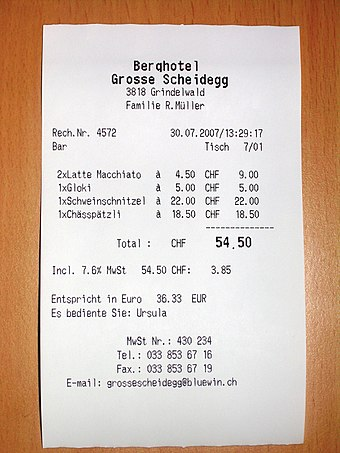

In [38]:
cv2_imshow(img)

In [41]:
GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

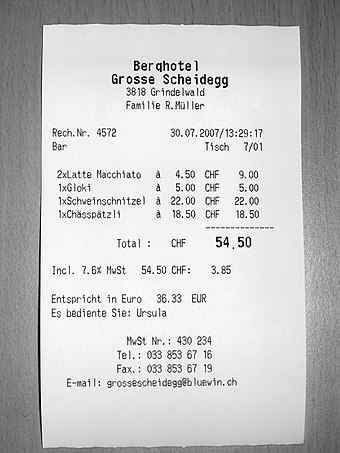

In [44]:
cv2_imshow(GrayImg)

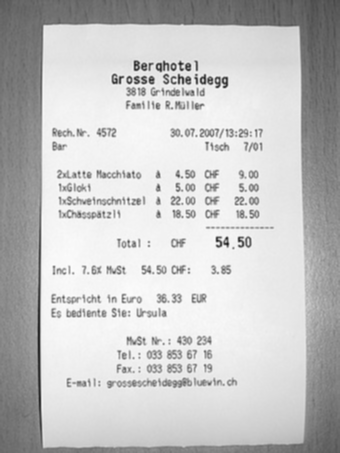

In [52]:
BlurredFrame = cv2.GaussianBlur(GrayImg,(3,3),0)
cv2_imshow(BlurredFrame)

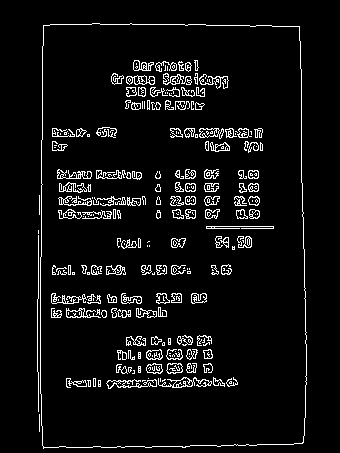

In [61]:
CannyFrame=cv2.Canny(BlurredFrame,100,200)
cv2_imshow(CannyFrame)

In [72]:
contours,_=cv2.findContours(CannyFrame,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ContourFrame= img.copy()
Countourframe = cv2.drawContours(ContourFrame,contours,-1,(255,0,255))

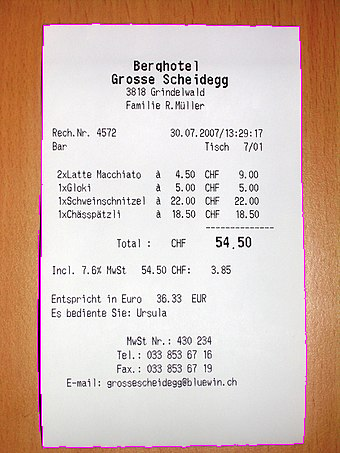

In [73]:
cv2_imshow(CountourFrame)

In [80]:
maxArea=0
biggest=[]
CornerFrame=img.copy()
for cont in contours:
  area=cv2.contourArea(cont)
  peri=cv2.arcLength(cont,True)
  edges=cv2.approxPolyDP(cont,0.02*peri,True)   #four corners
  if area>maxArea and len(edges) == 4:
    biggest=edges
    maxArea=area
  if len(biggest) != 0:
    CornerFrame = cv2.drawContours(CornerFrame,biggest,-1,(255,255,0),10)

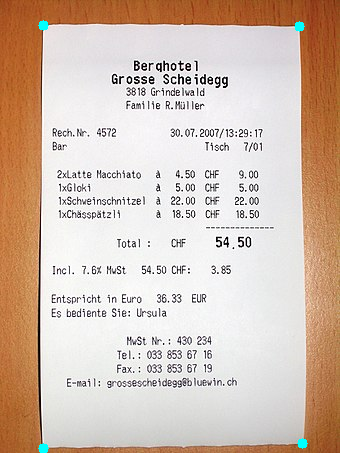

In [81]:
cv2_imshow(CornerFrame)

In [141]:
edge=[(i.tolist())[0] for i in edges]
edge=np.array(edge,np.float32)
edge

array([[ 43.,  25.],
       [ 43., 448.],
       [302., 443.],
       [299.,  26.]], dtype=float32)

In [96]:
(tl,bl,br,tr)=edges
widthA = np.sqrt(((br[0][0] - bl[0][0]) ** 2) + ((br[0][1] - bl[0][1]) ** 2))
widthB = np.sqrt(((tr[0][0] - tl[0][0]) ** 2) + ((tr[0][1] - tl[0][1]) ** 2))
maxWidth = max(int(widthA), int(widthB))

In [95]:
heightA = np.sqrt(((tr[0][0] - br[0][0]) ** 2) + ((tr[0][1] - br[0][1]) ** 2))
heightB = np.sqrt(((tl[0][0] - bl[0][0]) ** 2) + ((tl[0][1] - bl[0][1]) ** 2))
maxHeight = max(int(heightA), int(heightB))

In [131]:
dst = np.array([
		[0, 0],
    [0, maxHeight - 1],
		[maxWidth - 1, maxHeight - 1],
		[maxWidth - 1, 0]], dtype = "float32")

In [142]:
M = cv2.getPerspectiveTransform(edge, dst)
warped = cv2.warpPerspective(img, M, (maxWidth, maxHeight))

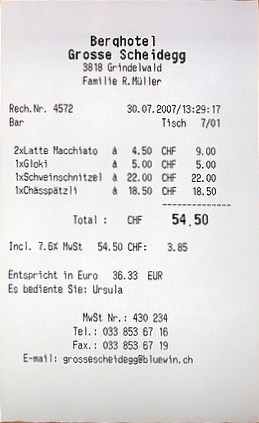

In [143]:
cv2_imshow(warped)